In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

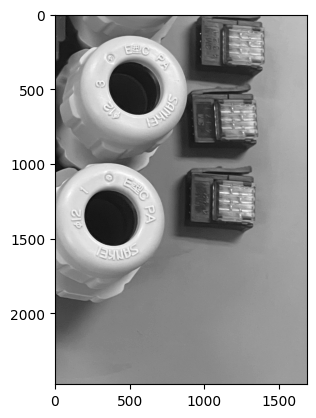

In [38]:
# Opening image
img = cv2.imread("/content/drive/MyDrive/TPR Project/image for checking/IMG_9270.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

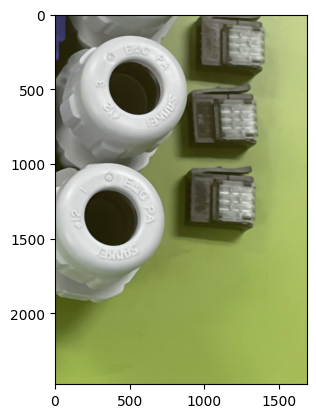

In [39]:
image_blur = cv2.medianBlur(img,15)
plt.imshow(image_blur, cmap='gray')

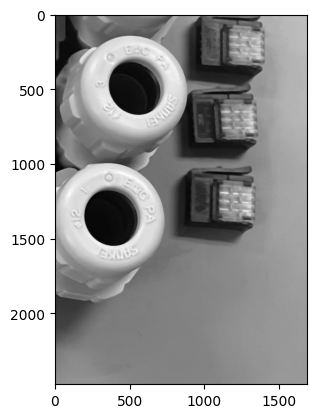

In [40]:
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
plt.imshow(image_blur_gray, cmap='gray')

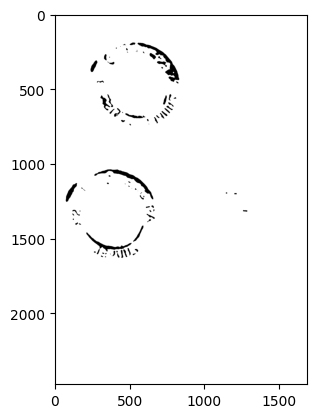

In [41]:
image_res ,image_thresh = cv2.threshold(image_blur_gray,230,255,cv2.THRESH_BINARY_INV)
plt.imshow(image_thresh, cmap='gray')

In [42]:
kernel = np.ones((3,3),np.uint8)

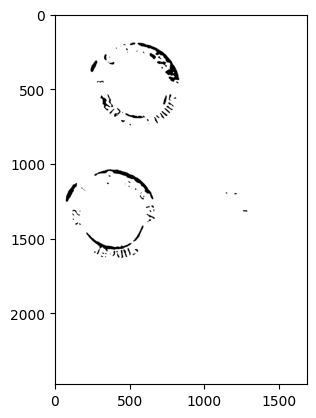

In [43]:
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel)
plt.imshow(opening, cmap='gray')

In [44]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

In [45]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

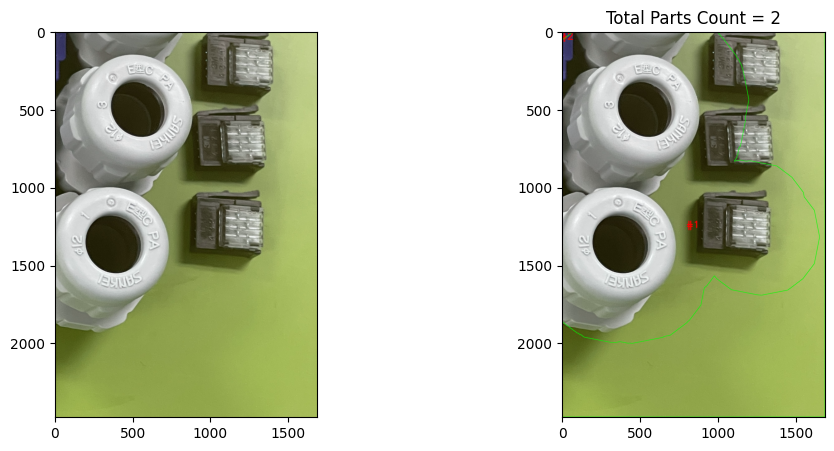

In [46]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread("/content/drive/MyDrive/TPR Project/image for checking/IMG_9270.jpeg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Parts Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

display(img,len(cnts))